#🧪 Practical 2 – MODERATE
Support Vector Machine (Linear Kernel)

#1️⃣ Objective

To build a linear Support Vector Machine (SVM) model for customer churn prediction, tune hyperparameter C and class_weight, and evaluate the model using the F1-score.

#2️⃣ Dataset Selection

Chosen Dataset:
DS5 – Telco Customer Churn

Why DS5 again?

Binary classification problem

Slight class imbalance → motivates use of class_weight

Suitable for margin-based classifiers like Linear SVM

Same dataset, but more advanced model + tuning → MODERATE level

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report


In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


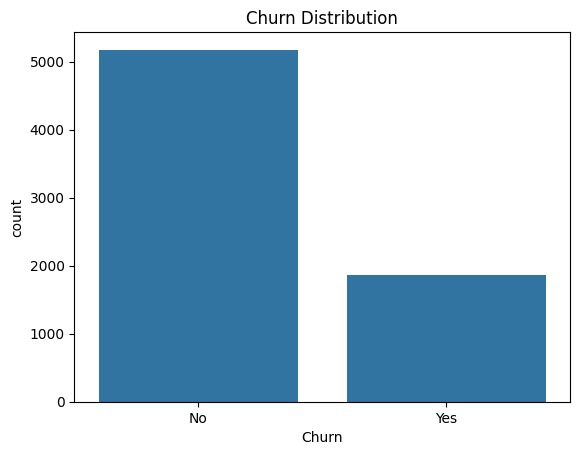

In [4]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


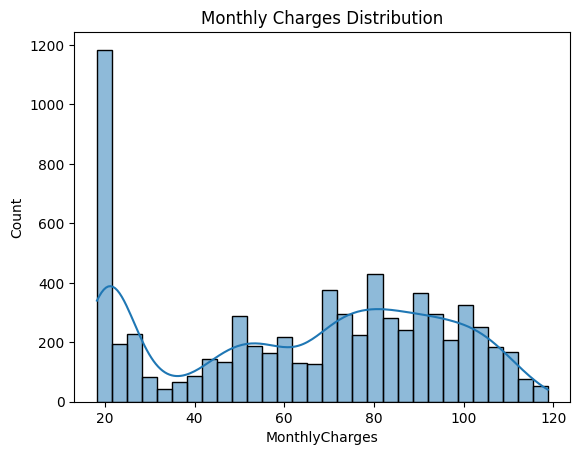

In [5]:
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title("Monthly Charges Distribution")
plt.show()


In [6]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'].unique()


array([0, 1])

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


/tmp/ipython-input-2576541415.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [8]:
df.drop('customerID', axis=1, inplace=True)


In [9]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.shape


(7043, 31)

In [10]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


In [11]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [13]:
svm = SVC(kernel='linear')


In [14]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced']
}


#F-1 SCORE

In [15]:
grid = GridSearchCV(
    svm,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced']},
             scoring='f1')

In [16]:
grid.best_params_


{'C': 0.01, 'class_weight': 'balanced'}

In [17]:
best_svm = grid.best_estimator_

y_val_pred = best_svm.predict(X_val_scaled)


In [19]:
f1 = f1_score(y_val, y_val_pred)
print("F1 Score:", f1)


F1 Score: 0.5875598086124402


In [20]:
print(classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1035
           1       0.46      0.82      0.59       374

    accuracy                           0.69      1409
   macro avg       0.68      0.73      0.67      1409
weighted avg       0.79      0.69      0.71      1409



#🔹 Brief Explanation (Moderate – Linear SVM)

The Telco Customer Churn dataset was used to perform binary classification using a linear Support Vector Machine. Initial exploratory data analysis was carried out to understand the dataset structure, missing values, and class distribution. The target variable Churn was encoded into numeric form, and categorical features were converted using one-hot encoding. Feature scaling was applied because SVM is sensitive to feature magnitudes. Hyperparameters C and class_weight were tuned using GridSearchCV to control margin strength and handle class imbalance. The final model was evaluated using the F1-score, which provides a balanced measure of precision and recall for imbalanced datasets.